<a href="https://colab.research.google.com/github/yachika-yashu/Machine-learning/blob/main/simple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [ ]:
df=pd.read_csv('placement.csv')

In [ ]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


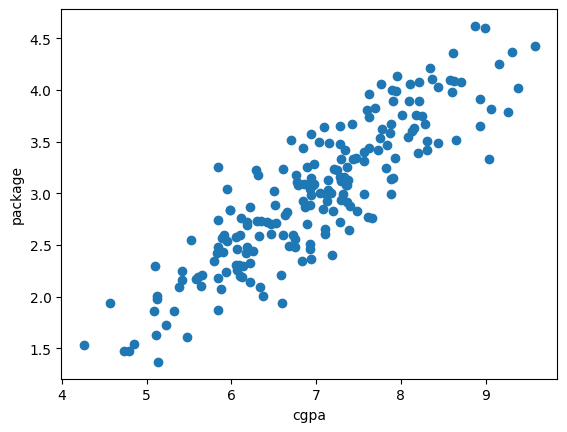

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()

Here comes the best part: Machine learning

# **Step 1: Train-Test split**
1. Dividing inputs (capital X) Your features (independent variables) and outputs (y) Your target (dependent variable)
2. Split the whole dataset into training and testing data and putting the test size, test_size=0.2: 20% of the dataset goes into testing and 80% is used for training the model, random_state=2: This fixes the randomness of the split, so you get the same split every time you run the code. Useful for reproducibility when you're testing or sharing code.

In [ ]:
#Libraries required for train test split and linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

# **Step 2:Train Machine Learning Model**
1. Select the algorithm




2. *Fit* the algo to train

In [ ]:

lr = LinearRegression()

#This creates a Linear Regression model — a type of supervised learning model used to predict continuous numerical values
#Linear regression finds the best-fitting straight line (or hyperplane in multiple dimensions) through the data.

In [ ]:
lr.fit(X_train,y_train) #.fit() is where the learning happens: it takes input features and target values

#The model learns the best coefficients (m) and intercept (b) for the equation:

#so predicted values  ŷ = m1 * x1 +m2x2+m3x3+....+ b
#So the model tries to minimize the difference between:

#The actual values (y_train)

#And the predicted values (ŷ = lr.predict(X_train))

LinearRegression()

In [ ]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

NameError: name 'lr' is not defined

Plotting the line

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train))
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()